## ICV21_Assignment #1
- 전기정보공학부
- 2016-13343
- 유상윤

### Problem 1. 2D Fourier Transform of Images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

1. load images img1, and img2 with 'imread'

In [2]:
img1 = cv2.imread('data/img1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('data/img2.jpg', cv2.IMREAD_GRAYSCALE)

2. Display the images

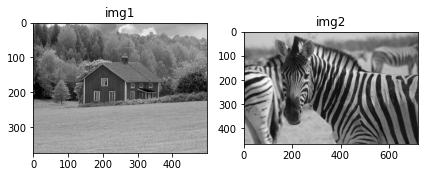

In [3]:
fig, ax = plt.subplots(1, 2)

ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
ax[0].set_title("img1")
ax[1].set_title("img2")

fig.tight_layout()
plt.show()

3. Next resize the img2 to be the same size as the img1

In [4]:
img2 = cv2.resize(img2, dsize=(img1.shape[1],img1.shape[0]))

4. Perform 2D DFT on img1, and img2

In [5]:
img1_fft = np.fft.fftshift(np.fft.fft2(img1))
img2_fft = np.fft.fftshift(np.fft.fft2(img2))

5. Display magnitude and phase of eache image

img1


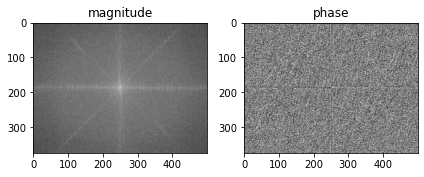

img2


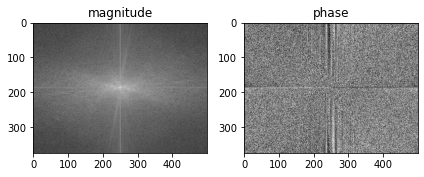

In [6]:
img1_mag = np.abs(img1_fft)
img1_phase = np.angle(img1_fft)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(20*np.log(img1_mag), cmap='gray')
ax[1].imshow(img1_phase, cmap='gray')
ax[0].set_title("magnitude")
ax[1].set_title("phase")
fig.tight_layout()

print("img1")
plt.show()

img2_mag = np.abs(img2_fft)
img2_phase = np.angle(img2_fft)

fig, ax = plt.subplots(1, 2)
ax[0].imshow(20*np.log(img2_mag), cmap='gray')
ax[1].imshow(img2_phase, cmap='gray')
ax[0].set_title("magnitude")
ax[1].set_title("phase")
fig.tight_layout()

print("img2")
plt.show()

6. Synthesize new images new_img1 and new_img2 by combining img1_mag + img2_phase and img2_mag + img1_phase, respectively

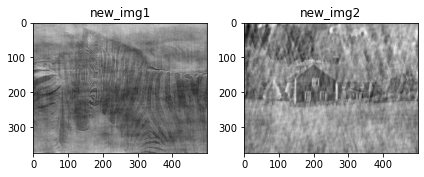

In [7]:
new_img1 = np.real(np.fft.ifft2(np.fft.ifftshift(np.multiply(img1_mag, np.exp(1j*img2_phase)))))

new_img2 = np.real(np.fft.ifft2(np.fft.ifftshift(np.multiply(img2_mag, np.exp(1j*img1_phase)))))

fig, ax = plt.subplots(1, 2)
ax[0].imshow(new_img1, cmap='gray')
ax[1].imshow(new_img2, cmap='gray')
ax[0].set_title("new_img1")
ax[1].set_title("new_img2")
fig.tight_layout()

plt.show()

### Problem 1. Discussion

By looking new_img1 and new_img2, we can see that both images look similar with the original image which has the same phase.

It is because phase has the information of the contour of the images.

### Problem 2. Perspective Image Transforms

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### 1. Perform the 2D projective transforms defined by the following 4 matrices for img1

1) Read img1

In [9]:
img1 = cv2.imread('data/img1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

2) Given M_transposes

In [10]:
M_T_list = [np.array([[1.6322, 0, 0],
                [0.2120, 1.6336, 0.0013],
                [-101.9757, -0.6322, 1.0000]]),

            np.array([[1.4219, 0.3183, 0.0013],
                    [0, 1.4206, 0],
                    [-0.4206, -101.8704, 1.0000]]),
                    
            np.array([[0.7033, -0.2239, -0.0009],
                    [0, 0.9991, 0],
                    [0.2958, 0.2239, 1.0000]]),
            
            np.array([[1.1044, -0.3493, 0.0003],
                    [0.0011, 1.5066, 0.0011],
                    [-0.1041, 0.1560, 1.0000]])
            ]

3) function to get projection image by given image and M matrix used equation below

<img src="assets/problem2_equation(1).png" style="width: 300px;"/>

In [11]:
def get_proj_img(img, M):
    proj_img = np.zeros(img1.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            p, q, r = np.matmul(M, np.array([i,j,1]))
            u = p/r
            v = q/r
            if u <= img.shape[0] and v <= img.shape[1]:
                proj_img[int(u)][int(v)] = img[i][j]
    
    return proj_img


4) get projection images and save as projected{i}.png file

(image fie will be saved in directory projected_imgs/)

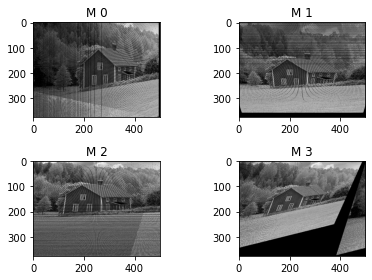

In [22]:
fig, ax = plt.subplots(2, 2)

for i, M_T in enumerate(M_T_list):
    proj_img = get_proj_img(img1, np.transpose(M_T))
    ax[i//2, i%2].set_title('M {}'.format(i))
    ax[i//2, i%2].imshow(proj_img, cmap='gray')
    plt.imsave('projected_imgs/projected{}.png'.format(i+1), proj_img, cmap='gray')

fig.tight_layout()
plt.show()

### Problem 2. Discussion

using the equation, projection image seems to be well made

### Problem 3. Camera Calibration

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

#### 3.a) Show that the solution p is the last column of 𝐕, corresponding to the smallest eigenvalue of A. 

\begin{equation*}
p = min_p(||Ap||), \; A = UDV^T
\end{equation*}

\begin{equation*}
||Ap|| = p^TA^TAp = p^TVD^TU^TUDV^Tp = p^TVD^2V^Tp = 
p^T\begin{pmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots  & \vdots  & \ddots & \vdots  \\
0 & 0 & \cdots & \lambda_n 
\end{pmatrix}p
\end{equation*}


$$ p \; can \; be \; decomposed \; into \; \; p = \Sigma c_iv_i $$
 
$$ since \; ||p|| = 1, \;\;\; following \; is \; true \; \Sigma c_i^2 = 1 $$
\begin{equation*}
p^T\begin{pmatrix}
\lambda_1 & 0 & \cdots & 0 \\
0 & \lambda_2 & \cdots & 0 \\
\vdots  & \vdots  & \ddots & \vdots  \\
0 & 0 & \cdots & \lambda_n 
\end{pmatrix}p = \Sigma c_i^2\lambda_i^2
\end{equation*}

$$ min_p(||Ap||) = min_p(\Sigma c_i^2\lambda_i^2) $$


$$ In \; np.linalg.svd(), \;\; \lambda_i > 0\;\; and \;\; (\lambda_1 > \lambda_2 > \cdots > \lambda_n) $$
 
$$ So, \; \lambda_n \; is\;smallest \; eigenvalue \; and \; p \; minimizing \; the \; expression \; ||Ap|| \; is \; as \; below$$
$$ c_n = 1, p = v_n $$

#### 3.b) Given the following correspond points, determine the camera projection matric P using the SVD method. 

1) Given (u,v) and (x,y,z)

In [14]:
uv = np.array([[880,214],[43,203],[270,197],[886,347],[745,302],[943,128],
                [476,590],[419,214],[317,335],[783,521],[235,427],[665,429],[655,362],[427,333],
                [412,415],[746,351],[434,415],[525,234],[716,308],[602,187]],dtype=np.float32)

XYZ = np.array([[312.747,309.14,30.086],[305.796,311.649,30.356],
                    [307.694,312.358,30.418],[310.149,307.186,29.298],[311.937,310.105,29.216],
                    [311.202,307.572,30.682],[307.106,306.876,28.66],
                    [309.317,312.49,30.23],[307.435,310.151,29.318],
                    [308.253,306.3,28.881],[306.65,309.301,28.905],
                    [308.069,306.831,29.189],[309.671,308.834,29.029],
                    [308.255,309.955,29.267],[307.546,308.613,28.963],
                    [311.036,309.206,28.913],[307.518,308.175,29.069],
                    [309.95,311.262,29.99],[312.16,310.772,29.08],[311.988,312.709,30.514]],dtype=np.float32)

2) make A by Given equation below and Given (u,v) and (x,y,z)

<img src="assets/problem3_equation(1).png" style="width: 400px;"/>

In [15]:
A = np.zeros((2*len(uv),12))

for i in range(len(uv)):
    u_i, v_i = uv[i]
    X_i, Y_i, Z_i = XYZ[i]
    A[2*i] = np.array([X_i, Y_i, Z_i, 1, 0, 0, 0, 0, -u_i*X_i, -u_i*Y_i, -u_i*Z_i, -u_i])
    A[2*i+1] = np.array([0, 0, 0, 0, X_i, Y_i, Z_i, 1, -v_i*X_i, -v_i*Y_i, -v_i*Z_i, -v_i])

3) use SVD method to decompose A, then last column of V is p

In [16]:
u, s, vh = np.linalg.svd(A, full_matrices=True)
p = vh[-1]
p /= p[-1]

4) reshape vector p into matrix P

In [17]:
P = np.reshape(p, (3,4))
print(P)

[[-2.33261286e+00 -1.10020234e-01  3.37490343e-01  7.36686704e+02]
 [-2.31041064e-01 -4.79515779e-01  2.08721751e+00  1.53626639e+02]
 [-1.26376391e-03 -2.06774463e-03  5.14662103e-04  1.00000000e+00]]


#### 3.c) In equation in b), set m_34 = 1, get equation Ap = b, then use pseudo inverse to get the least square solution p

1) make b, A with Given equation below p is size 11 (m_34 is 1 so will be added later)

<img src="assets/problem3_equation(2).png" style="width: 400px;"/>

In [18]:
b = np.zeros((2*len(uv),))

for i in range(len(uv)):
    u_i, v_i = uv[i]
    b[2*i] = u_i
    b[2*i+1] = v_i

A = np.zeros((2*len(uv),11))

for i in range(len(uv)):
    u_i, v_i = uv[i]
    X_i, Y_i, Z_i = XYZ[i]
    A[2*i] = np.array([X_i, Y_i, Z_i, 1, 0, 0, 0, 0, -u_i*X_i, -u_i*Y_i, -u_i*Z_i])
    A[2*i+1] = np.array([0, 0, 0, 0, X_i, Y_i, Z_i, 1, -v_i*X_i, -v_i*Y_i, -v_i*Z_i])

2) get pseudo inverse of A

In [19]:
A_T = np.transpose(A)
A_pseudo_inv = np.matmul(np.linalg.inv(np.matmul(A_T, A)), A_T)

3) use equation below to get p

<img src="assets/problem3_equation(3).png" style="width: 80px;"/>

In [20]:
p = np.matmul(A_pseudo_inv, b)

4) reshape vector p into matrix P
$$ (add \; m_{34} = 1 \; in \; matrix \; P) $$

In [21]:
P = np.resize(p, (3,4))
P[-1][-1] = 1
print(P)

[[-2.33259421e+00 -1.09988242e-01  3.37390954e-01  7.36674050e+02]
 [-2.31047155e-01 -4.79506733e-01  2.08717179e+00  1.53627131e+02]
 [-1.26378942e-03 -2.06771124e-03  5.14584938e-04  1.00000000e+00]]


### Problem 3. Discussion

If we have world coordinates and projection coordinates, we can get projection matrix.